In [13]:
import pandas as pd # for datafram manipulation
import numpy as np # for array operations
import matplotlib.pyplot as plt # for data visualizations and EDA
import seaborn as sns # for data visualization charts
%matplotlib inline

In [14]:
df1 = pd.read_csv('spam_data.txt', sep = '\t')

In [15]:
df1

,LABEL,MESSAGE
0,ham,I see a cup of coffee animation
1,spam,Congrats! 1 year special cinema pass for 2 is ...
2,spam,Sunshine Quiz Wkly Q! Win a top Sony DVD playe...
3,ham,Oh k...i'm watching here:)
4,ham,Eh u remember how 2 spell his name... Yes i di...
...,...,...
5570,spam,Had your contract mobile 11 Mnths? Latest Moto...
5571,ham,"No, I was trying it all weekend ;V"
5572,ham,"You know, wot people wear. T shirts, jumpers, ..."
5573,ham,"Cool, what time you think you can get here?"


In [16]:
df1.isnull().sum() # no null data points, so dataset is clean!

LABEL      0
MESSAGE    0
dtype: int64

In [17]:
# Add a legth column to see if it is one of the factor for classification
df1['LENGTH'] = df1['MESSAGE'].apply(len)

In [18]:
df1

,LABEL,MESSAGE,LENGTH
0,ham,I see a cup of coffee animation,31
1,spam,Congrats! 1 year special cinema pass for 2 is ...,161
2,spam,Sunshine Quiz Wkly Q! Win a top Sony DVD playe...,125
3,ham,Oh k...i'm watching here:),26
4,ham,Eh u remember how 2 spell his name... Yes i di...,81
...,...,...,...
5570,spam,Had your contract mobile 11 Mnths? Latest Moto...,160
5571,ham,"No, I was trying it all weekend ;V",34
5572,ham,"You know, wot people wear. T shirts, jumpers, ...",87
5573,ham,"Cool, what time you think you can get here?",43


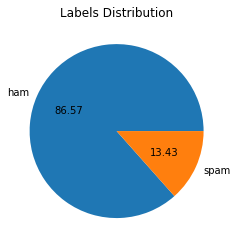

In [19]:
# unbalanced dataset, wont be able to get accuracy and precision for the right model evaluation metrics.
plt.pie(df1['LABEL'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.title('Labels Distribution')
plt.show()

In [20]:
# Separate out ham and spam datapoints
ham = df1[df1['LABEL']=='ham']
spam = df1[df1['LABEL']=='spam']

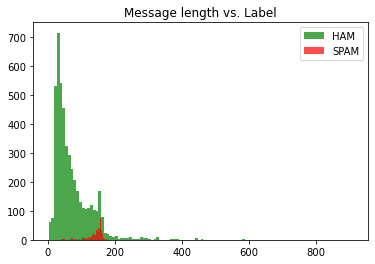

In [21]:
plt.hist(ham['LENGTH'], bins = 110, alpha = 0.7, label='HAM', color='g')
plt.hist(spam['LENGTH'], bins = 110, alpha = 0.7, label='SPAM', color='r')
plt.title('Message length vs. Label')
plt.legend()
plt.show()

In [22]:
# from the graph above, we see a pattern that smaller length are ham and larger length are spam.
ham

,LABEL,MESSAGE,LENGTH
0,ham,I see a cup of coffee animation,31
3,ham,Oh k...i'm watching here:),26
4,ham,Eh u remember how 2 spell his name... Yes i di...,81
5,ham,Fine if thats the way u feel. Thats the way ...,56
7,ham,Is that seriously how you spell his name?,41
...,...,...,...
5569,ham,Rofl. Its true to its name,26
5571,ham,"No, I was trying it all weekend ;V",34
5572,ham,"You know, wot people wear. T shirts, jumpers, ...",87
5573,ham,"Cool, what time you think you can get here?",43


In [23]:
spam

,LABEL,MESSAGE,LENGTH
1,spam,Congrats! 1 year special cinema pass for 2 is ...,161
2,spam,Sunshine Quiz Wkly Q! Win a top Sony DVD playe...,125
6,spam,England v Macedonia - dont miss the goals/team...,155
21,spam,Thanks for your subscription to Ringtone UK yo...,158
29,spam,07732584351 - Rodger Burns - MSG = We tried to...,172
...,...,...,...
5540,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90
5543,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158
5564,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147
5565,spam,This is the 2nd time we have tried 2 contact u...,160


In [24]:
ham.shape, spam.shape

((4826, 3), (749, 3))

In [25]:
# to balance the dataset, we need same number of datapoints for ham and spam
ham = ham.sample(spam.shape[0])

In [26]:
ham.shape, spam.shape

((749, 3), (749, 3))

In [27]:
df2 = ham.append(spam, ignore_index = True)

In [28]:
df2

,LABEL,MESSAGE,LENGTH
0,ham,HCL chennai requires FRESHERS for voice proces...,167
1,ham,Id onluy matters when getting on from offcampus,47
2,ham,If he started searching he will get job in few...,87
3,ham,Can you pls pls send me a mail on all you know...,155
4,ham,Where are you ? What are you doing ? Are yuou ...,139
...,...,...,...
1493,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90
1494,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158
1495,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147
1496,spam,This is the 2nd time we have tried 2 contact u...,160


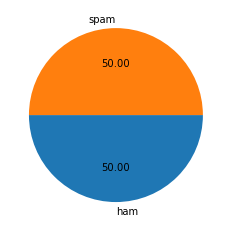

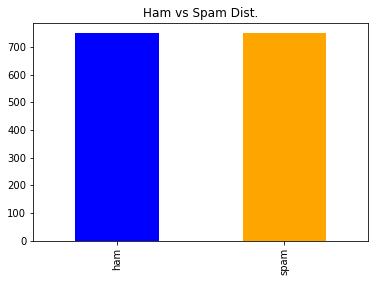

In [101]:
# Now we have balanced dataset
plt.pie(df2['LABEL'].value_counts(), labels=['ham','spam'], autopct="%0.2f", counterclock=False)
plt.show()

df2['LABEL'].value_counts().plot(kind = 'bar', color = ['blue', 'orange'])
plt.title('Ham vs Spam Dist.');

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Text Vectorization
tfidf_obj = TfidfVectorizer() # Feature extraction
X = tfidf_obj.fit_transform(df2['MESSAGE'])
X = X.toarray() # Sparse matrix

In [102]:
X_train, X_test, y_train, T_test = train_test_split(X, df2['LABEL'], test_size=0.2, random_state=0, shuffle=True, stratify=df2['LABEL'])

In [103]:
# Building the Classifier

In [104]:
rfc = RandomForestClassifier(n_estimators=100, n_jobs= -1)

In [105]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [106]:
y_predict = rfc.predict(X_test)

In [107]:
conf_mat = confusion_matrix(T_test, y_predict)

<AxesSubplot:>

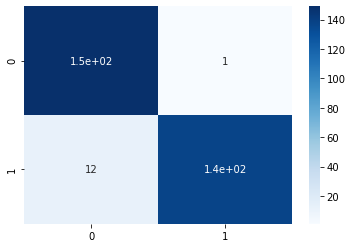

In [108]:
sns.heatmap(conf_mat, annot = True, cmap= 'Blues')

In [109]:
# only about few samples were not correctly classified. Good results overall

In [110]:
print(classification_report(T_test, y_predict))

              precision    recall  f1-score   support

         ham       0.93      0.99      0.96       150
        spam       0.99      0.92      0.96       150

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [111]:
# we can see we correctly classified all spam messages and ham percentage is pretty descent too.

In [112]:
# Using SVM

In [113]:
from sklearn.svm import SVC

clf = SVC(C = 1000, gamma='auto')

In [114]:
clf.fit(X_train, y_train)

SVC(C=1000, gamma='auto')

In [115]:
def predict(m):
    m = tfidf_obj.transform([m])
    res = clf.predict(m.toarray())
    return res

In [116]:
predict('Winner!! You have won 1 million dollar')

array(['spam'], dtype=object)

In [117]:
predict('hello david, how are you. Text me back when you can, asap!')

array(['ham'], dtype=object)

In [118]:
# Using Multinomial Naive Bayes

In [119]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()
vect = v.fit_transform(df2['MESSAGE'])

In [120]:
from sklearn.naive_bayes import MultinomialNB

multi_nb_classifier = MultinomialNB()
multi_nb_classifier.fit(vect, df2['LABEL'])

MultinomialNB()

In [121]:
def predict_multi_nb(t):
    t = v.transform([t])
    result = multi_nb_classifier.predict(t.toarray())
    return result

In [122]:
predict_multi_nb('You have won $1000 dollars lottery!!')

array(['spam'], dtype='<U4')

<AxesSubplot:>

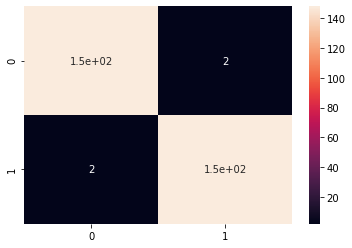

In [123]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_predict = multi_nb_classifier.predict(X_test)
conf_mat_mnb = confusion_matrix(T_test, y_predict)
sns.heatmap(conf_mat_mnb, annot = True)